In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.pyplot import figure

In [3]:
dataframe = pd.read_csv("D:\\Logistic_code\\code\\vrp\\clustering\\fuzzy_c_mean\\data2.csv")

In [4]:
dataframe

,X,Y,Demand
0,500,500,0
1,740,442,8
2,261,710,10
3,578,522,8
4,482,914,5
...,...,...,...
105,806,568,5
106,907,703,7
107,821,135,7
108,622,561,9


In [5]:
data = dataframe.to_numpy()

In [6]:
data.shape

(110, 3)

### Initialize parameters

In [7]:
# Initialize number of clusters
num_cluster = 10
# Vehicla capacity
vehicle_capa = 600
# Fuzzy parameter
m = 2.0
# Maximum number of iteration
MAX_ITER = 100
# length of element
num_element = data.shape[0]

### Intialtize weight matrix with random values

In [8]:
def initialize_weight_matrix(num_cluster, num_element):
    weight_matrix = list()
    for i in range(num_element):
        random_list = [random.random() for i in range(num_cluster)]
        random_list_sum = sum(random_list)
        random_list = [x / random_list_sum for x in random_list]
        weight_matrix.append(random_list)
    return np.array(weight_matrix)

In [88]:
weight_matrix = initialize_weight_matrix(num_cluster,num_element)

In [147]:
weight_matrix.shape

(106, 10)

### Calculating cluster center

In [165]:
a = np.array([[1,2], [2,3], [9,4], [10,1]])
# b = initialize_weight_matrix(2,4)
b = np.array([[0.4, 0.6] , [0.88, 0.12], [0.41, 0.59], [0.27, 0.73]])


In [166]:
np.dot(np.transpose(b * b), a) / np.expand_dims(np.sum(b * b, axis=0), axis=0).T


array([[3.36115365, 2.88284839],
       [7.05010355, 2.14154851]])

In [9]:
def calculate_cluster_center(weight_matrix:np.ndarray, data:np.ndarray):
    return np.dot(np.transpose(weight_matrix * weight_matrix), data) / np.expand_dims(np.sum(weight_matrix * weight_matrix, axis=0), axis=0).T

In [168]:
cluster_center = calculate_cluster_center(b, a)

In [169]:
cluster_center

array([[3.36115365, 2.88284839],
       [7.05010355, 2.14154851]])

In [170]:
a

array([[ 1,  2],
       [ 2,  3],
       [ 9,  4],
       [10,  1]])

In [171]:
b

array([[0.4 , 0.6 ],
       [0.88, 0.12],
       [0.41, 0.59],
       [0.27, 0.73]])

### Updating weight matrix

In [10]:
def calculate_euclidean_distance(a:np.ndarray, b:np.ndarray):
    return np.linalg.norm(a - b)

In [11]:
def update_weight_matrix(cluster_center:np.ndarray, data:np.ndarray):
    temp = np.expand_dims(data, axis=0) - np.expand_dims(cluster_center, axis=1)
    distance = np.sqrt(np.sum(temp ** 2, axis = 2)).T
    return (1 / distance) / np.expand_dims(np.sum((1 / distance), axis = 1),-1)

### Fuzzy c-means clusterring

In [12]:
def fuzzy_c_means_clustering(num_cluster:int, data:np.ndarray):
    num_element = data.shape[0]
    weight_matrix = initialize_weight_matrix(num_cluster, num_element)
    curr = 0
    cluster_labels = None
    while curr <= MAX_ITER:
        cluster_center = calculate_cluster_center(weight_matrix, data)
        weight_matrix = update_weight_matrix(cluster_center, data)
        cluster_labels = weight_matrix.argmax(axis = 1)
        curr = curr + 1
    return cluster_center, weight_matrix, cluster_labels

In [13]:
# data = np.array([[1,2], [2,3], [9,4], [10,1]])
num_cluster = 10
MAX_ITER = 1000
cluster_center, weight_matrix, cluster_labels = fuzzy_c_means_clustering(num_cluster, data[:,:2])

### Supervised Fuzzty C-means

In [18]:
def supervised_fuzzy_c_mean_clustering(num_cluster:int, data:np.ndarray, capacity:int):
    """
        num_cluster: number of vehicles. Can be increased if demand exceeds capacity
        data: data point and demand. Shape: [K, 3] with K is number of data point. Each row is (lat, lon, demand)
        capacity : vehicle capacity
    """
    cluster_center, weight_matrix, cluster_labels = None, None, None
    flag = True
    while flag:
        print(f"---------------Starting clustering with {num_cluster} vehicles---------------")
        ## Clustering
        cluster_center, weight_matrix, cluster_labels = fuzzy_c_means_clustering(num_cluster, data[:,:2])
        ## Check demand in each clusters
        is_exceeds = False
        for i in range(num_cluster):
            demand = np.sum(data[cluster_labels == i][:,2:3])
            if demand > capacity:
                print(f"Demand exceed at cluster {i} ({demand} > {capacity}). Increaseing number of vehicle to 1")
                is_exceeds = True
                num_cluster = num_cluster + 1
                break
        if not is_exceeds:
            flag = False
            print(f"Finishing clustering with number of vehicles {num_cluster}")

    return cluster_center, weight_matrix, cluster_labels, num_cluster
num_cluster = 10
MAX_ITER = 1000
capacity = 6600
cluster_center, weight_matrix, cluster_labels, num_cluster = supervised_fuzzy_c_mean_clustering(num_cluster, data, capacity)

---------------Starting clustering with 10 vehicles---------------
Finishing clustering with number of vehicles 10


In [68]:
num_cluster


52

In [69]:
cluster_labels

array([ 6, 14,  4,  5,  2, 38, 45, 39, 44,  2, 31, 20, 47, 17, 26, 20, 46,
       22, 33, 27, 29, 47, 11, 24,  2, 12, 20, 22, 22, 46, 25, 22, 48,  2,
       29, 16, 11, 39, 42, 21, 32, 34, 29, 11, 24, 29,  7, 31, 16, 15, 43,
       20, 37, 20, 34, 30, 30, 39, 47, 22, 11, 11, 50, 47, 11, 23, 20, 29,
       34, 35, 24, 41, 47, 16, 48, 34, 30, 28, 46, 51,  3, 17, 39, 11, 10,
       20, 31, 10, 34,  9, 46, 19, 29, 11, 39, 22, 21, 29, 20, 23, 50,  2,
       36, 36, 11, 13, 29, 39, 49, 18], dtype=int64)

### Ploting

In [19]:

def plot_points(cluster_labels:np.ndarray, cluster_center:np.ndarray, data:np.ndarray):
    figure(figsize=(14, 12), dpi=80)
    cluster_label_unique_len = len(np.unique(cluster_labels))
    cluster_color = np.random.rand(cluster_label_unique_len, 3)  

    ## Plot point
    point_color = cluster_color[cluster_labels]
    for i in range(data.shape[0]):
        point = data[i]
        plt.scatter(point[0], point[1], marker="o", c=[point_color[i]])

     ## plot cluster center
    plt.scatter(cluster_center[:,0], cluster_center[:,1], marker="x", c=[[0,0,0]])

    plt.show()

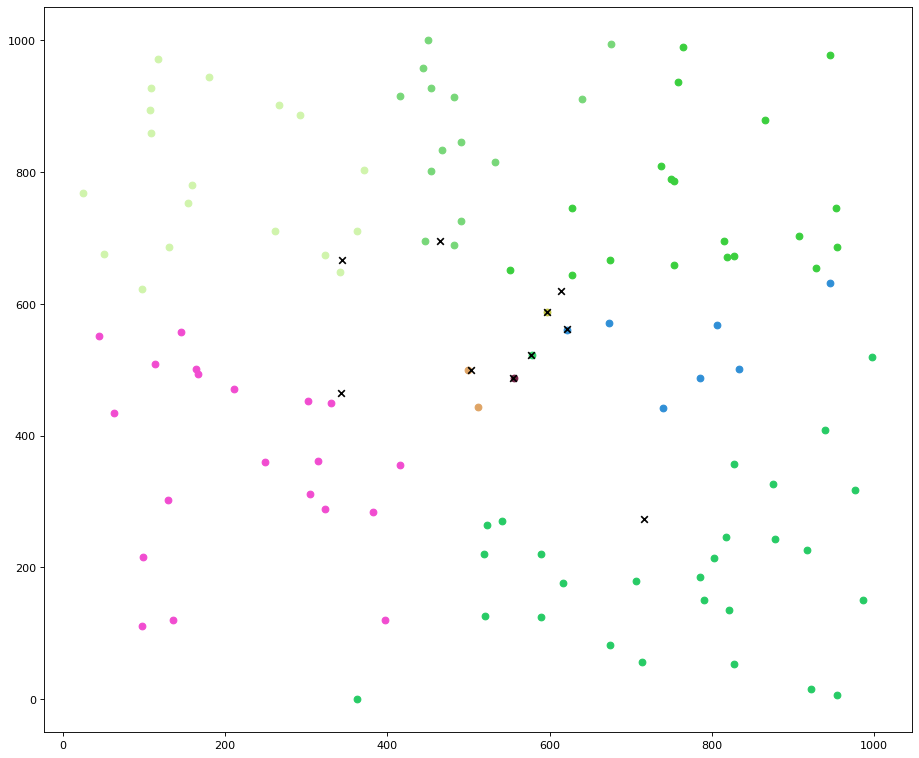

In [20]:
plot_points(cluster_labels, cluster_center, data)